$\newcommand{\ht}{\hat \theta} $
$\newcommand{\vt}{\vec \theta} $
$\newcommand{\ve}{\vec \epsilon} $
$\newcommand{\vx}{\vec x} $
$\newcommand{\vy}{\vec y} $
$\newcommand{\hess}{H^T \Sigma^{-1} H}$
$\newcommand{\ce}{{\cal E}}$
$\newcommand{\cl}{{\cal L}}$
$\newcommand{\cn}{{\cal N}}$
$\newcommand{\LH}{{\cal L}(\vx|\vt)}$
$\newcommand{\PO}{{P}(\vt|\vx)}$
$\newcommand{\PR}{{P}(\vt)}$
$\newcommand{\EV}{{P}(\vx)}$
$\newcommand{\eqnp}[1]{\begin{pmatrix} #1 \end{pmatrix}}$
$\newcommand{\eqnb}[1]{\begin{bmatrix} #1 \end{bmatrix}}$

In [38]:
from __future__ import print_function


%matplotlib inline

import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = [16, 8]

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Ignore Python warnings

import warnings
from IPython.display import display

# warnings.filterwarnings('ignore')


# KNN Methods for Classification, Regression, and Oversampling
**Sarah Allam s3747328**


<h1>Table of Contents<span class="tocSkip"></span></h1>

In [39]:
def plot_data_distribution(data, labels):
    X_train = data[0:len(labels)]

    # plot data distribution
    healthy = X_train[labels == 1]
    aml = X_train[labels == 2]

    plt.bar(['Healthy', 'AML'], [healthy.shape[0], aml.shape[0]])
    plt.text(0, healthy.shape[0] + 1, str(healthy.shape[0]), ha='center')
    plt.text(1, aml.shape[0] + 1, str(aml.shape[0]), ha='center')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.title('Data Distribution')
    plt.show()

'Number of features: '

186

'Number of samples: '

359

'Number of labels: '

179

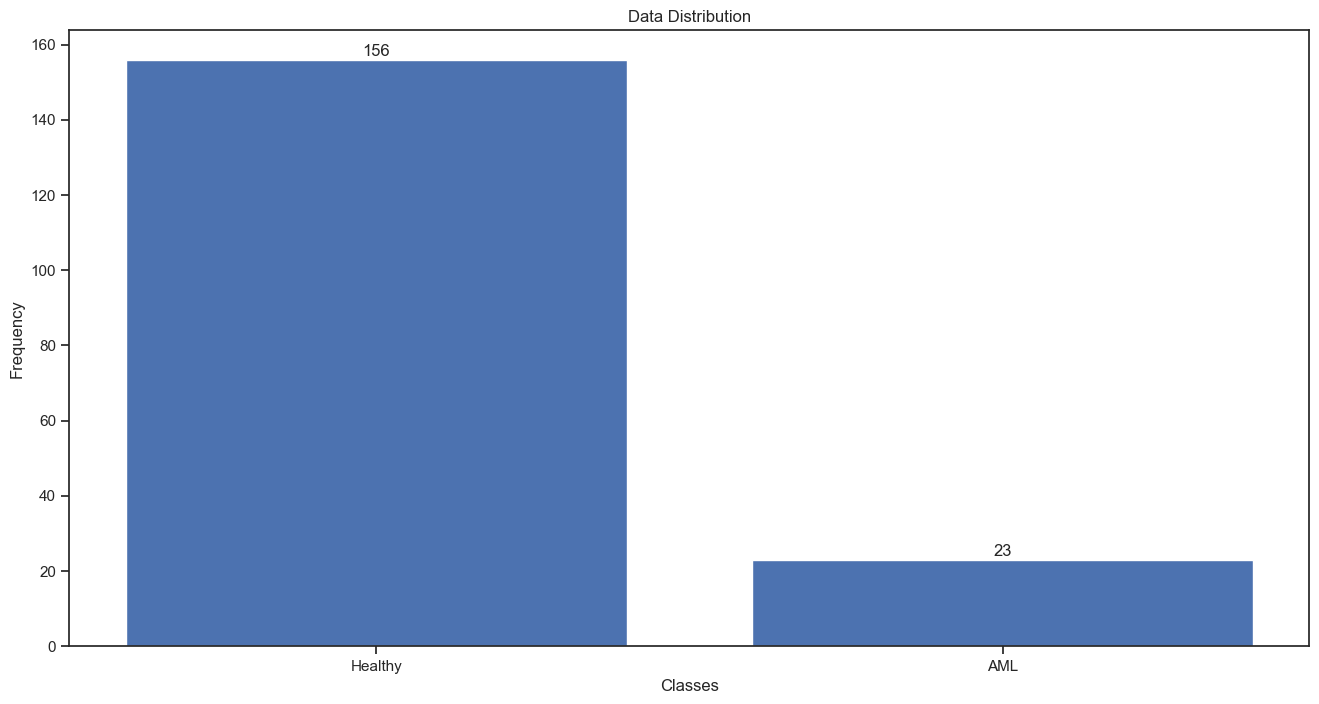

In [40]:
def load_data():
    # Load data
    data =np.genfromtxt("data.csv", delimiter=",")
    labels = np.genfromtxt("labels.csv", delimiter=",")
    # data = np.loadtxt('data.csv')
    # labels = np.loadtxt('labels.csv')

    # print number of features and the number of samples
    display("Number of features: ", data.shape[1])
    display("Number of samples: ", data.shape[0])
    display("Number of labels: ", labels.shape[0])
    return data, labels

data, labels = load_data()
plot_data_distribution(data, labels)

In [41]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import DecisionBoundaryDisplay


# Function to generate and plot points
def generate_knn(n_neighbors, knn_weights):
    np.random.seed(42)  # Set seed for reproducibility

    clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors, weights=knn_weights))]
    )
    _, axs = plt.subplots(ncols=1, figsize=(12, 5))

    clf.set_params(knn__weights=knn_weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=axs,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={knn_weights!r})"
    )
    plt.show()

# Interactive sliders for the number and variance of points
interact(
    generate_knn,
    n_neighbors=widgets.IntSlider(min=1, max=50, step=1, value=11, description='Number of neighbours:'),
    knn_weights = widgets.Dropdown(
    options=[("uniform", "uniform"), ("distance", "distance")],
    value="uniform",
    description='Weight determining neighbours:',
    )
    # num_blue=widgets.IntSlider(min=1, max=200, step=1, value=100, description='Num Blue Points:'),
    # variance_red=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description='Var Red Points:'),
    # variance_blue=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=3.0, description='Var Blue Points:')
)


interactive(children=(IntSlider(value=11, description='Number of neighbours:', max=50, min=1), Dropdown(descri…

<function __main__.generate_knn(n_neighbors, knn_weights)>

In [42]:

import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

from sklearn.model_selection import train_test_split

X = data[:179]
y = labels
display(len(X))
display(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.inspection import DecisionBoundaryDisplay


# Function to generate and plot points
def generate_knn_clf(n_neighbors, knn_weights):
    np.random.seed(42)  # Set seed for reproducibility

    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=knn_weights)
    clf = clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    # print("y_score : ", y_score)
    y_pred = clf.predict(X_test)

    fig = px.scatter(
        X_test, x=0, y=1,
        color=y_score, color_continuous_scale='RdBu',
        symbol=np.squeeze(y_test),
        symbol_map={'0': 'square-dot', '1': 'circle-dot'},
        labels={'symbol': 'label', 'color': 'score of <br>first class'}
    )
    fig.update_traces(marker_size=12, marker_line_width=1.5)
    fig.update_layout(legend_orientation='h')
    fig.show()

# Interactive sliders for the number and variance of points
interact(
    generate_knn_clf,
    n_neighbors=widgets.IntSlider(min=1, max=50, step=1, value=11, description='Number of neighbours:'),
    knn_weights = widgets.Dropdown(
    options=[("uniform", "uniform"), ("distance", "distance")],
    value="uniform",
    description='Weight determining neighbours:',
    )
    # num_blue=widgets.IntSlider(min=1, max=200, step=1, value=100, description='Num Blue Points:'),
    # variance_red=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description='Var Red Points:'),
    # variance_blue=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=3.0, description='Var Blue Points:')
)



179

179

interactive(children=(IntSlider(value=11, description='Number of neighbours:', max=50, min=1), Dropdown(descri…

<function __main__.generate_knn_clf(n_neighbors, knn_weights)>

In [43]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
# Function to generate and plot points
def generate_knn_regressor(n_data_points, noise, n_neighbors, knn_weights):
    np.random.seed(42)
    X = np.sort(np.random.rand(n_data_points, 1), axis=0)
    T = np.linspace(0, 1, 500)[:, np.newaxis]
    y_true = np.sin(X).ravel() # select everything but the last 100 points
    y_test = np.sin(T).ravel() # select the last 100 points for test set
    # Add noise to targets
    # display(noise)
    # random_indices = np.random.choice(len(y), size=noise, replace=False)
    noise = np.random.normal(loc=0, scale=noise, size=len(y_true))

    # Add noise to the original array
    y = y_true + noise

    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=knn_weights)
    y_ = knn.fit(X, y).predict(T)

    error = np.sqrt(mean_squared_error(y_test, y_))
    display("Error is:  ", error)

    plt.subplot(1, 1, 1)
    plt.scatter(X, y, color="darkorange", label="noisy data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.plot(X, y_true, color="black", label="true function")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, knn_weights))

    plt.tight_layout()
    plt.show()

# Interactive sliders for the number and variance of points
interact(
    generate_knn_regressor,
    n_data_points=widgets.IntSlider(min=10, max=200, step=1, value=40, description='Number of data Points:'),
    noise=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.1, description='Noise added to data:'),
    n_neighbors=widgets.IntSlider(min=1, max=50, step=1, value=11, description='Number of neighbours:'),
    knn_weights = widgets.Dropdown(
    options=[("uniform", "uniform"), ("distance", "distance")],
    value="uniform",
    description='Weight determining neighbours:',
    )
    # variance_blue=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=3.0, description='Var Blue Points:')
)

interactive(children=(IntSlider(value=40, description='Number of data Points:', max=200, min=10), FloatSlider(…

<function __main__.generate_knn_regressor(n_data_points, noise, n_neighbors, knn_weights)>

In [44]:
#SMOTE
from sklearn.model_selection import train_test_split

X = data[:179]
y = labels
display(len(X))
display(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

179

179